In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprice.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'price')

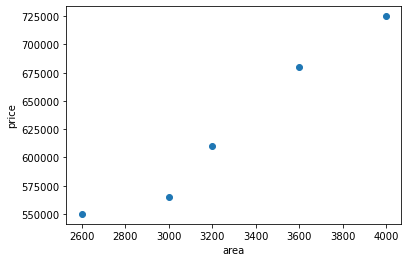

In [3]:
%matplotlib inline
plt.scatter(df.area, df.price)
plt.xlabel("area")
plt.ylabel("price")

In [4]:
df_area = df.drop('price', axis = 1)

In [5]:
df_price = df.price

In [6]:
model = linear_model.LinearRegression()
model.fit(df_area, df_price)

LinearRegression()

In [7]:
model.predict([[3300]])

array([628715.75342466])

## linear regression formula => y = mx + b 
##    m = slope or gradient or coef
##    y = dependent value
##    x =  independent value 
##    b =  intercept

In [8]:
model.coef_   # this calculates and shows value of " m "

array([135.78767123])

In [9]:
model.intercept_  #this calculates and gives shows value of " b "

180616.43835616432

## y =  m * x + b

In [10]:
#y = price = 
135.78767123 * 3300 +  180616.43835616432

628715.7534151643

In [11]:
model.predict([[5000]])

array([859554.79452055])

In [12]:
a = pd.read_csv('areas.csv')
a.head(5)

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [13]:
p = model.predict(a)

In [14]:
a['price'] = p

In [15]:
a

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [16]:
a.to_csv('prediction.csv', index = False)

Text(0, 0.5, 'price')

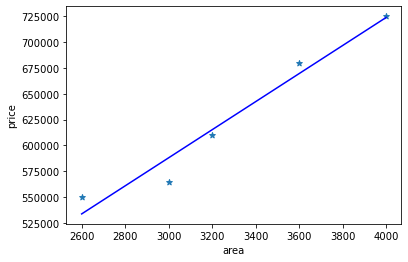

In [17]:
%matplotlib inline
plt.scatter(df.area, df.price, marker = "*")
plt.plot(df.area,model.predict(df[['area']]), color = 'blue')
plt.xlabel("area")
plt.ylabel("price")

In [18]:
import pickle

In [19]:
with open('reg_model', 'wb') as f:
    pickle.dump(model, f)

In [20]:
with open('reg_model', 'rb') as f:
    pic_mod = pickle.load(f)

In [21]:
pic_mod.predict([[5000]])

array([859554.79452055])

## save model in and as joblib file 

In [22]:
# from sklearn.externals import joblib
# joblib.dump(model, 'model_joblib')
# mj = joblib.load('model_joblib')
# mj.predict([[5000]])